##  Spaceship Titanic
Predict which passengers are transported to an alternate dimension

### we are going to use the following approach:
    1- problem definition
    2- Data
    3- Evaluation
    4- Features
    5- modelling
    6- exprimentation

### 1- problem definition
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
### 2- DATA
the original data came from the cleavland data from the kaggle website https://www.kaggle.com/competitions/spaceship-titanic/
### 3- Evaluation
if we can reach 95% accuracy at predicting wheather the patient has or has not a heart disease during the proof of concept, we will pursue the project.
### 4- Features
create data dictionary
there is where we will get different information about the features
for example
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.(target or label)

### preparing the tools
we are going to use pandas, matplotlib, and numpy for data analysis and manipulation

In [1]:
# importing all the tools we need
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
len(df)

8693

In [5]:
df.shape

(8693, 14)

### EDA (exploratory data analysis) 
> 1- what question(s) are we trying to solve \
2- what kind of data do we have and do we treat different types? \
3- what's missing from the data and how we deal with it \
4- where are the outliers and why should we care about them \
5- how can we add, change or remove features to get more out of our data 



In [6]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

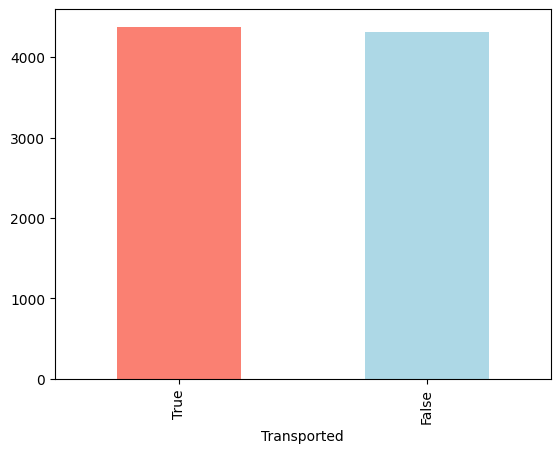

In [7]:
df['Transported'].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
# looking for missing values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='HomePlanet'>

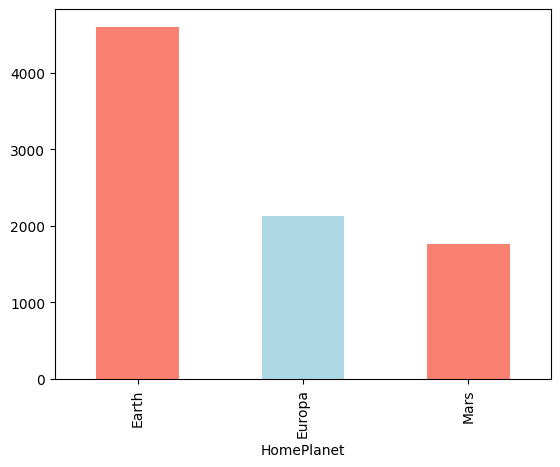

In [10]:
df.HomePlanet.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [11]:
pd.crosstab(df.Transported,df.HomePlanet)

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


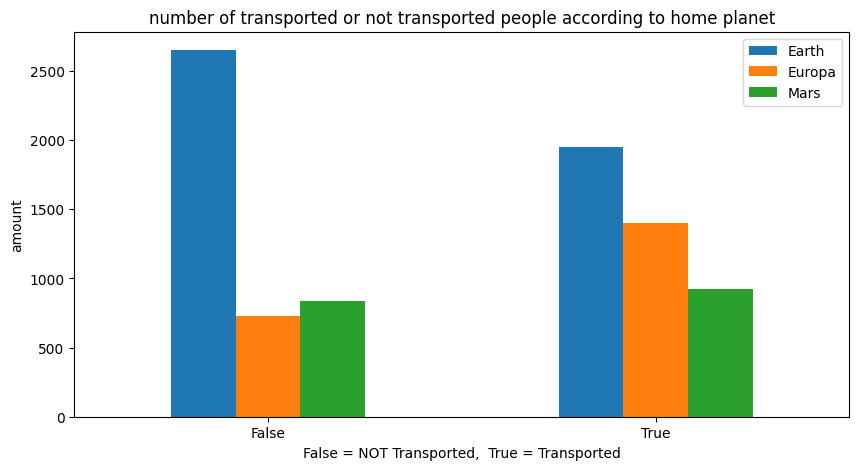

In [12]:
pd.crosstab(df.Transported,df.HomePlanet).plot(kind="bar",figsize=(10,5))
plt.title("number of transported or not transported people according to home planet")
plt.xlabel("False = NOT Transported,  True = Transported")
plt.ylabel("amount")
plt.legend(["Earth","Europa","Mars"])
plt.xticks(rotation=0);

In [13]:
df.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [14]:
df.Age.value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

In [15]:
#df["Transported"] = df["Transported"].astype(int)

In [16]:
df["Transported"] = df["Transported"].astype(bool)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

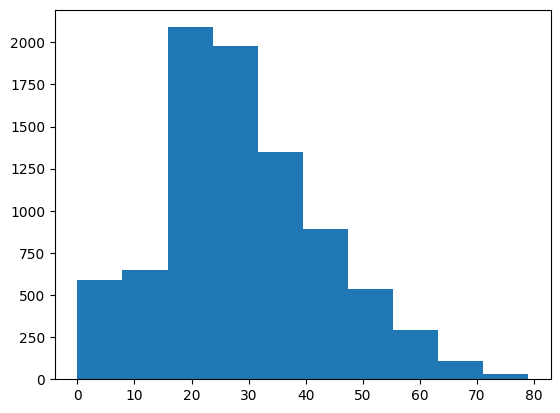

In [18]:
plt.hist(df["Age"])

In [19]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId


In [20]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [21]:
df_test=pd.read_csv("test.csv")

In [22]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   category
 1   HomePlanet    4190 non-null   object  
 2   CryoSleep     4184 non-null   object  
 3   Cabin         4177 non-null   object  
 4   Destination   4185 non-null   object  
 5   Age           4186 non-null   float64 
 6   VIP           4184 non-null   object  
 7   RoomService   4195 non-null   float64 
 8   FoodCourt     4171 non-null   float64 
 9   ShoppingMall  4179 non-null   float64 
 10  Spa           4176 non-null   float64 
 11  VRDeck        4197 non-null   float64 
 12  Name          4183 non-null   object  
dtypes: category(1), float64(6), object(6)
memory usage: 735.4+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   category
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(1), float64(6), object(6)
memory usage: 1.1+ MB


In [25]:
df.isnull().sum()/len(df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [26]:
# fill numeric missing values first
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [27]:
# check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [28]:
# fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [29]:
# fill numeric rows with the median
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"]=pd.isnull(content)
            df_test[label]=content.fillna(content.median())

In [30]:
## filling and turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [31]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column for missing values
        df[label+"_is_missing"] = pd.isnull(content)
        df[label]=pd.Categorical(content).codes+1

In [32]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column for missing values
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label]=pd.Categorical(content).codes+1

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   int16  
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  Age_is_missing          

In [34]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
HomePlanet,2,1,2,2,1
CryoSleep,1,1,1,1,1
Cabin,150,2185,2,2,2187
Destination,3,3,3,3,3
Age,39.0,24.0,58.0,33.0,16.0
VIP,1,1,2,1,1
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0


In [35]:
df.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Transported                0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
PassengerId_is_missing     0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   int16  
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  Age_is_missing          

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              4277 non-null   int16  
 1   HomePlanet               4277 non-null   int8   
 2   CryoSleep                4277 non-null   int8   
 3   Cabin                    4277 non-null   int16  
 4   Destination              4277 non-null   int8   
 5   Age                      4277 non-null   float64
 6   VIP                      4277 non-null   int8   
 7   RoomService              4277 non-null   float64
 8   FoodCourt                4277 non-null   float64
 9   ShoppingMall             4277 non-null   float64
 10  Spa                      4277 non-null   float64
 11  VRDeck                   4277 non-null   float64
 12  Name                     4277 non-null   int16  
 13  Age_is_missing           4277 non-null   bool   
 14  RoomService_is_missing  

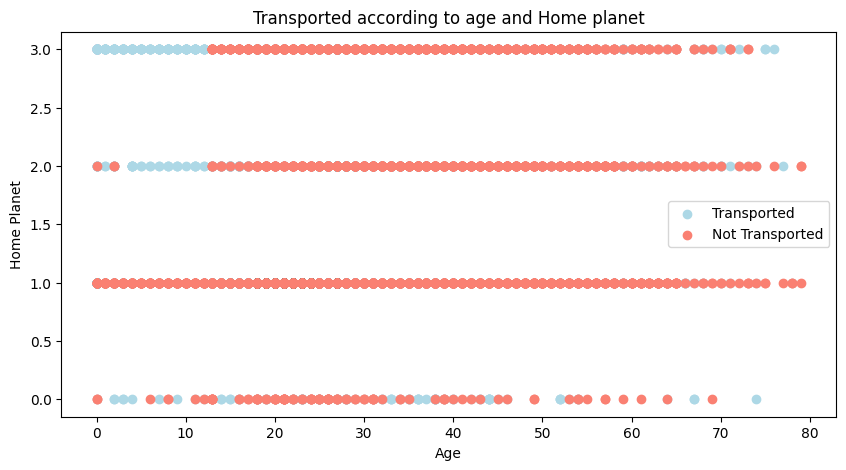

In [38]:
# age vs HomePlanet
plt.figure(figsize=(10,5))

plt.scatter(df.Age[df.Transported==True],df.HomePlanet[df.Transported==True],color="lightblue")
plt.scatter(df.Age[df.Transported==False],df.HomePlanet[df.Transported==False],color="salmon")
plt.title("Transported according to age and Home planet")
plt.xlabel("Age")
plt.ylabel("Home Planet")
plt.legend(["Transported","Not Transported"]);

In [39]:
X=df.drop("Transported",axis=1)
Y=df["Transported"]

In [40]:
 # split data into train and test sets
np.random.seed(42)

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [41]:
models={
    "logistic regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier()}

# create a function to fit and score the model
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    # set random seed
    np.random.seed(42)
    # loop through models
    model_scores={}
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,Y_train)
        # evaluate the model and appends its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)

    return model_scores

In [42]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

c:\Users\kirol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.7602070155261644,
 'KNN': 0.7211040828062104,
 'RandomForest': 0.7780333525014376}

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
np.random.seed(42)
model1=GradientBoostingClassifier()
model1.fit(X_train,Y_train)


GradientBoostingClassifier()

In [93]:
y_preds1=model1.predict(X_test)
y_preds1

array([False,  True,  True, ..., False,  True, False])

In [97]:
accuracy1=accuracy_score(Y_test,y_preds1)
accuracy1

0.7901092581943646

In [112]:
xg_reg={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,1)}

np.random.seed(42)
rs_xg_reg=RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions=xg_reg,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_xg_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [113]:
rs_xg_reg.score(X_test, Y_test)

0.7906843013225991

In [114]:
y_preds=rs_xg_reg.predict(X_test)
y_preds

array([False,  True, False, ..., False,  True, False])

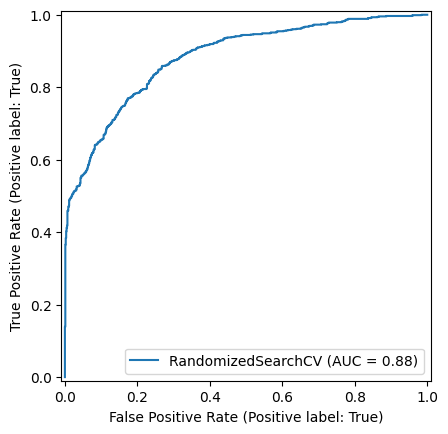

In [115]:
RocCurveDisplay.from_estimator(rs_xg_reg,X_test,Y_test)

In [116]:
rs_xg_reg.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [117]:
clf=GradientBoostingClassifier(n_estimators=110,
                               min_samples_split=6,
                               min_samples_leaf=9,
                               max_depth=5)

In [118]:
# CV accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc


0.6511055849326789

In [119]:
# CV precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.7823420210992061

In [120]:
# CV recall
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.5603590345727333

In [121]:
# CV f1-score
cv_f=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f=np.mean(cv_f)
cv_f

0.5781350864212219

<Axes: title={'center': 'Cross Validation classification metrics'}>

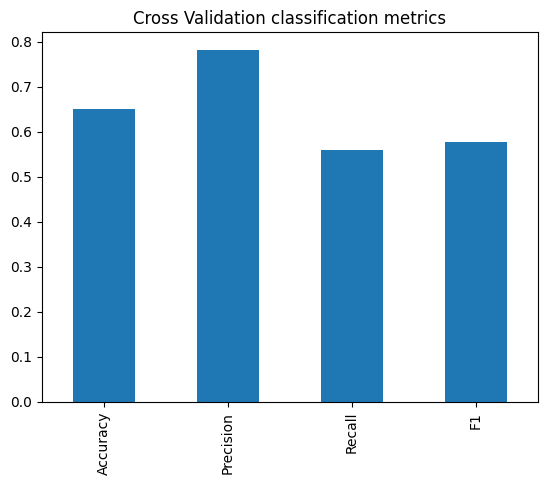

In [122]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross Validation classification metrics",legend=False)

In [107]:
set(df)-set(df_test.columns)


{'Transported'}

In [123]:
df_t=df_test.copy()
df_t.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False


In [124]:
test_preds=rs_xg_reg.predict(df_t)

In [125]:
df_temp=pd.read_csv("test.csv")

In [126]:
df_final=pd.DataFrame(df_temp["PassengerId"])
df_final.insert(1,"Transported",test_preds)
df_final.to_csv("submission1.csv",index=False)

<Axes: >

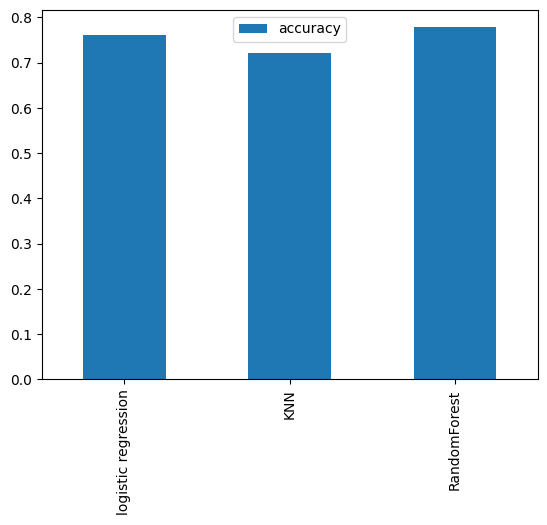

In [91]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

In [44]:

# hyperparameter tuning
# KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))



In [45]:
train_scores

[1.0,
 0.8685648547598505,
 0.8428242737992522,
 0.8235547886108714,
 0.8080241587575496,
 0.8073051481161921,
 0.7884670693126258,
 0.7932125395455852,
 0.777825711820535,
 0.780414150129422,
 0.7654587287891861,
 0.773799252228933,
 0.7610008628127696,
 0.7673281564567156,
 0.7563991947080817,
 0.7633016968651136,
 0.7535231521426518,
 0.7594190394017831,
 0.7489214840379638,
 0.7528041415012943]

In [46]:
test_scores

[0.7055779183438758,
 0.6998274870615296,
 0.7239792984473835,
 0.723404255319149,
 0.7211040828062104,
 0.7228292121909143,
 0.7228292121909143,
 0.730879815986199,
 0.7193789534215066,
 0.7251293847038528,
 0.7251293847038528,
 0.7239792984473835,
 0.7211040828062104,
 0.723404255319149,
 0.7101782633697528,
 0.7107533064979874,
 0.7015526164462335,
 0.7061529614721104,
 0.7050028752156412,
 0.706728004600345]

maximum KNN score on the test data:73.09


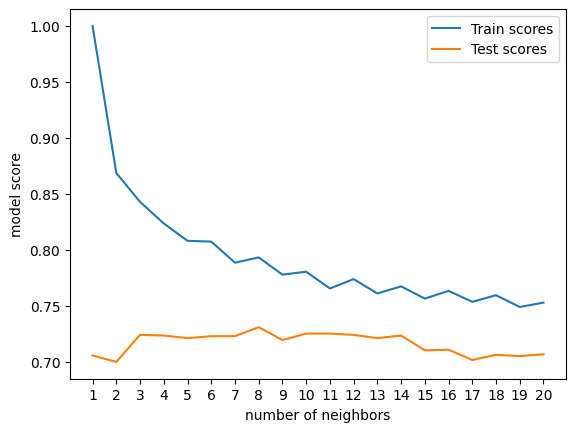

In [47]:
plt.plot(neighbors, train_scores,label="Train scores")
plt.plot(neighbors, test_scores,label="Test scores")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.xticks(np.arange(1,21))
plt.legend()
print(f"maximum KNN score on the test data:{max(test_scores)*100:.2f}")


In [48]:
# create hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create hyperparameter grid for RandomForestclassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,1)}

In [49]:
np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
rs_log_reg.score(X_test, Y_test)

0.7642323174238068

In [51]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

In [52]:
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
rs_rf.score(X_test, Y_test)

0.7906843013225991

In [54]:
model_scores

{'logistic regression': 0.7602070155261644,
 'KNN': 0.7211040828062104,
 'RandomForest': 0.7780333525014376}

In [55]:
#create hyperparameter grid for the logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [56]:
gs_log_reg.score(X_test, Y_test)

0.7671075330649799

In [57]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([False, False,  True, ..., False,  True, False])

In [58]:
np.array(Y_test)

array([ True, False, False, ..., False,  True, False])

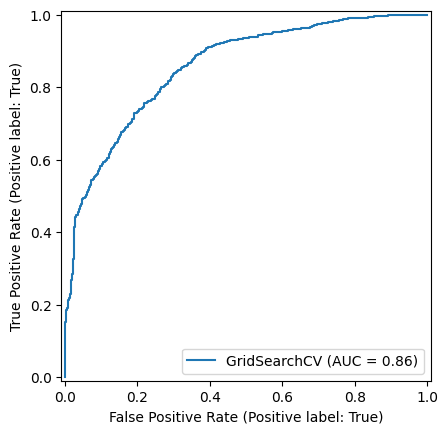

In [59]:
# plotting ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test)

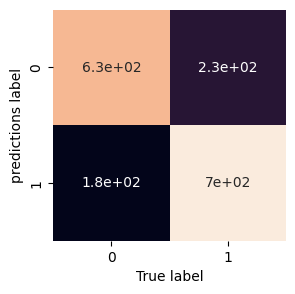

In [60]:
#sns.set(font_scale=1.5)
def plot_confusion_matrix(Y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predictions label")
plot_confusion_matrix(Y_test,y_preds)

In [61]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

       False       0.78      0.73      0.76       861
        True       0.75      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [62]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [63]:
clf=LogisticRegression(C=1.3738237958832638,
                       solver="liblinear")

In [64]:
# CV accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.7829294245399819

In [65]:
# CV precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.7662756951157845

In [66]:
# CV recall
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.820707371167645

In [67]:
# CV f1-score
cv_f=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f=np.mean(cv_f)
cv_f

0.7914860750713564

<Axes: title={'center': 'Cross Validation classification metrics'}>

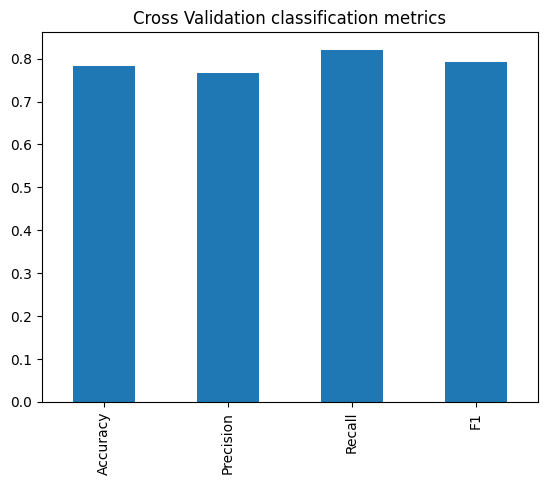

In [68]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross Validation classification metrics",legend=False)

In [69]:
set(df)-set(df_test.columns)

{'Transported'}

In [70]:
df_t=df_test.copy()

In [71]:
df_t.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,PassengerId_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Cabin_is_missing,Destination_is_missing,VIP_is_missing,Name_is_missing
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,...,False,False,False,False,False,False,False,False,False,False


In [72]:
test_preds=gs_log_reg.predict(df_t)

In [73]:
test_preds

array([ True, False,  True, ...,  True,  True,  True])

In [74]:
df_temp=pd.read_csv("test.csv")

df_final=pd.DataFrame(df_temp["PassengerId"])

In [75]:
df_final

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [76]:
df_final.insert(1,"Transported",test_preds)

In [77]:
df_final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [78]:
df_final.to_csv("submission.csv",index=False)